In [3]:
%matplotlib inline


This file construct the equations for brian2

/!\ cell parameters --NOT-- in SI units /!\ 


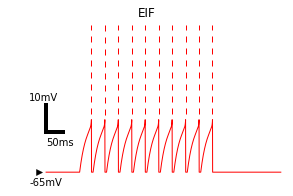

In [8]:
%run cell_construct.py -n EIF -c 'r'
plt.show()


This file construct the equations for brian2

/!\ cell parameters --NOT-- in SI units /!\ 


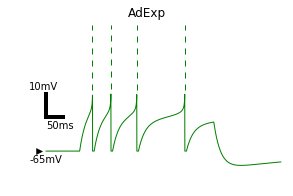

In [7]:
%run cell_construct.py -n AdExp -c 'g'
plt.show()